In [1]:
! chmod 600 kaggle.json

In [2]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download ghoshsaptarshi/av-genpact-hack-dec2018

av-genpact-hack-dec2018.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
! mkdir datasets

mkdir: cannot create directory ‘datasets’: File exists


In [4]:
import zipfile

In [5]:
with zipfile.ZipFile('/content/av-genpact-hack-dec2018.zip','r') as f:
  f.extractall('/content/datasets')

### **Loading Datasets Into DataFrame**

In [6]:
import pandas as pd

In [7]:
fulfilment_df = pd.read_csv("/content/datasets/fulfilment_center_info.csv")
meal_df = pd.read_csv("/content/datasets/meal_info.csv")
test_df = pd.read_csv("/content/datasets/test.csv")
train_df = pd.read_csv("/content/datasets/train.csv")

### **Merge datasets that has a subset**

In [8]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [9]:
meal_df

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [10]:
train_df = pd.merge(train_df, meal_df, how='inner', on='meal_id')

In [11]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai
3,1034383,1,83,1885,121.31,120.31,0,1,1025,Beverages,Thai
4,1118999,1,32,1885,114.52,113.52,0,1,445,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...
456543,1458599,145,65,2104,582.03,582.03,0,0,134,Fish,Continental
456544,1417199,145,110,2104,582.03,581.03,0,0,28,Fish,Continental
456545,1434028,145,68,2104,582.03,581.03,0,0,40,Fish,Continental
456546,1205895,145,51,2104,641.23,640.23,0,0,69,Fish,Continental


In [12]:
test_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


In [13]:
test_df = pd.merge(test_df, meal_df, how='inner',on='meal_id')

In [14]:
test_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai
1,1460444,146,24,1885,158.11,160.11,0,1,Beverages,Thai
2,1098228,146,11,1885,158.17,157.17,0,0,Beverages,Thai
3,1316160,146,83,1885,142.59,143.59,0,0,Beverages,Thai
4,1390579,146,32,1885,122.28,121.28,0,0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...
32568,1220126,155,43,2104,678.03,680.03,0,0,Fish,Continental
32569,1201456,155,65,2104,678.03,680.03,0,0,Fish,Continental
32570,1259792,155,110,2104,679.03,679.03,0,0,Fish,Continental
32571,1283607,155,68,2104,679.03,680.03,0,0,Fish,Continental


### **Looking at a particular feature**

In [15]:
train_df['cuisine'].unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [16]:
len(train_df[train_df['cuisine'] == 'Thai'])

118216

In [17]:
len(train_df[train_df['cuisine'] == 'Indian'])

112612

In [18]:
len(train_df[train_df['cuisine'] == 'Italian'])

122925

In [19]:
len(train_df[train_df['cuisine'] == 'Continental'])

102795

In [20]:
italian_cuisine = train_df[train_df['cuisine'] == 'Italian']
italian_cuisine

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
61955,1191377,1,55,1778,183.36,184.36,0,0,190,Beverages,Italian
61956,1168714,1,24,1778,177.51,179.51,0,0,377,Beverages,Italian
61957,1053516,1,11,1778,183.39,181.39,0,0,620,Beverages,Italian
61958,1234272,1,83,1778,174.63,175.63,0,0,188,Beverages,Italian
61959,1441945,1,32,1778,178.54,176.54,0,0,271,Beverages,Italian
...,...,...,...,...,...,...,...,...,...,...,...
446356,1332059,145,23,2490,291.03,292.03,0,0,162,Salad,Italian
446357,1012279,145,86,2490,290.03,290.03,0,0,420,Salad,Italian
446358,1212235,145,68,2490,280.36,279.36,0,0,107,Salad,Italian
446359,1301857,145,51,2490,291.03,290.03,0,0,325,Salad,Italian


In [21]:
italian_beverages = italian_cuisine[italian_cuisine['category'] == 'Beverages']
italian_beverages

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
61955,1191377,1,55,1778,183.36,184.36,0,0,190,Beverages,Italian
61956,1168714,1,24,1778,177.51,179.51,0,0,377,Beverages,Italian
61957,1053516,1,11,1778,183.39,181.39,0,0,620,Beverages,Italian
61958,1234272,1,83,1778,174.63,175.63,0,0,188,Beverages,Italian
61959,1441945,1,32,1778,178.54,176.54,0,0,271,Beverages,Italian
...,...,...,...,...,...,...,...,...,...,...,...
95331,1269993,145,23,2707,240.62,239.62,0,0,582,Beverages,Italian
95332,1081259,145,86,2707,235.71,237.71,0,0,202,Beverages,Italian
95333,1458308,145,68,2707,209.58,207.58,0,0,229,Beverages,Italian
95334,1054879,145,51,2707,227.01,227.01,0,0,755,Beverages,Italian


### **Data Preprocessing**

In [22]:
italian_beverages.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
dtype: int64

-- Explanation --

There are null values in the dataset

In [23]:
italian_beverages.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,3.338100e+04,33381.000000,33381.000000,33381.000000,33381.000000,33381.000000,33381.000000,33381.000000,33381.000000
mean,1.249634e+06,73.128007,83.261107,1848.674186,183.609524,189.970342,0.045924,0.027441,418.021329
std,1.440387e+05,41.820224,45.751710,673.523998,22.901404,23.883632,0.209324,0.163366,339.564139
min,1.000007e+06,1.000000,10.000000,1062.000000,100.910000,130.980000,0.000000,0.000000,13.000000
25%,1.125641e+06,37.000000,50.000000,1062.000000,162.990000,176.570000,0.000000,0.000000,189.000000
50%,1.250509e+06,73.000000,77.000000,1778.000000,181.390000,182.420000,0.000000,0.000000,323.000000
75%,1.374619e+06,109.000000,110.000000,2707.000000,192.060000,210.490000,0.000000,0.000000,539.000000
max,1.499985e+06,145.000000,186.000000,2707.000000,243.530000,243.530000,1.000000,1.000000,3483.000000


In [24]:
italian_beverages['meal_id'].unique()

array([1778, 1062, 2707])

In [25]:
italian_beverages = italian_beverages[italian_beverages['meal_id'] == 1778]
italian_beverages

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
61955,1191377,1,55,1778,183.36,184.36,0,0,190,Beverages,Italian
61956,1168714,1,24,1778,177.51,179.51,0,0,377,Beverages,Italian
61957,1053516,1,11,1778,183.39,181.39,0,0,620,Beverages,Italian
61958,1234272,1,83,1778,174.63,175.63,0,0,188,Beverages,Italian
61959,1441945,1,32,1778,178.54,176.54,0,0,271,Beverages,Italian
...,...,...,...,...,...,...,...,...,...,...,...
73071,1156033,145,23,1778,182.39,183.39,0,0,269,Beverages,Italian
73072,1301001,145,86,1778,195.03,193.03,0,0,175,Beverages,Italian
73073,1252552,145,68,1778,161.05,152.32,1,0,108,Beverages,Italian
73074,1395294,145,51,1778,190.12,192.12,0,0,581,Beverages,Italian


In [26]:
italian_beverages = italian_beverages.groupby(by='week').mean()

In [27]:
italian_beverages = italian_beverages.drop(columns=['id','center_id','meal_id','emailer_for_promotion','homepage_featured'],axis=1)
italian_beverages

,checkout_price,base_price,num_orders
week,,,
1,176.520000,176.383377,268.584416
2,180.826974,180.892763,257.802632
3,180.812597,181.316104,288.948052
4,180.870519,181.342468,294.077922
5,174.592500,177.335000,194.144737
...,...,...,...
141,178.960000,179.659481,346.857143
142,172.423896,175.511429,374.311688
143,172.833247,174.678831,435.766234


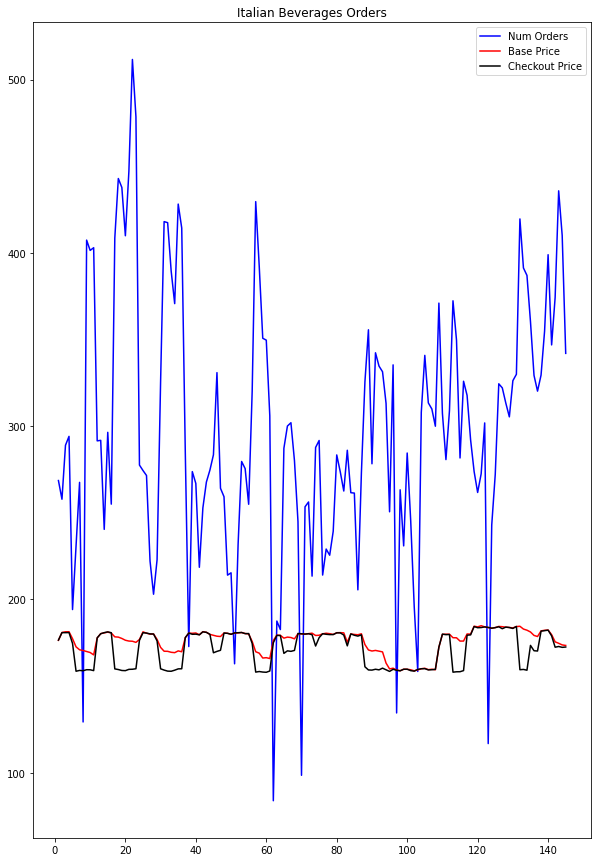

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
plt.plot(
    italian_beverages.index,
    italian_beverages['num_orders'],
    color='blue'
)
plt.plot(
    italian_beverages.index,
    italian_beverages['base_price'],
    color='red'
)
plt.plot(
    italian_beverages.index,
    italian_beverages['checkout_price'],
    color='black'
)
plt.legend(['Num Orders','Base Price','Checkout Price'])
plt.title("Italian Beverages Orders")
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
italian_beverages = scaler.fit_transform(italian_beverages)
italian_beverages

array([[0.70194017, 0.67585402, 0.43194026],
       [0.86475153, 0.8489512 , 0.40673381],
       [0.86420808, 0.86520155, 0.47954787],
       [0.86639764, 0.86621354, 0.49154086],
       [0.62907719, 0.71238301, 0.2579097 ],
       [0.02259704, 0.53175176, 0.3443495 ],
       [0.04056782, 0.4664249 , 0.42949732],
       [0.03395714, 0.4502401 , 0.10626415],
       [0.05600687, 0.42906424, 0.75630744],
       [0.05472857, 0.40619428, 0.74243401],
       [0.03633501, 0.35343378, 0.7460331 ],
       [0.75078009, 0.72864587, 0.48549842],
       [0.8401903 , 0.8245155 , 0.48615999],
       [0.86471671, 0.84133967, 0.36609788],
       [0.8813495 , 0.85776988, 0.49698804],
       [0.86272714, 0.83784958, 0.40012009],
       [0.07372398, 0.75307719, 0.75895293],
       [0.05983679, 0.74727384, 0.83939424],
       [0.03909056, 0.71731258, 0.82730497],
       [0.03548944, 0.67798211, 0.76218288],
       [0.06385074, 0.66000636, 0.84920715],
       [0.06616859, 0.65565764, 1.        ],
       [0.

In [30]:
italian_beverages = pd.DataFrame(
    italian_beverages,
    columns=['checkout_price','base_price','num_orders']
)
italian_beverages

,checkout_price,base_price,num_orders
0,0.701940,0.675854,0.431940
1,0.864752,0.848951,0.406734
2,0.864208,0.865202,0.479548
3,0.866398,0.866214,0.491541
4,0.629077,0.712383,0.257910
...,...,...,...
140,0.794177,0.801610,0.614932
141,0.547100,0.642383,0.679117
142,0.562574,0.610423,0.822790
143,0.544103,0.574254,0.762583


In [31]:
x = italian_beverages[['checkout_price','base_price']]
y = italian_beverages[['num_orders']]

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2021)

In [33]:
x_train

,checkout_price,base_price
0,0.701940,0.675854
60,0.028096,0.272607
64,0.412393,0.724769
24,0.862444,0.864245
105,0.051803,0.026897
...,...,...
109,0.832003,0.807687
128,0.976116,0.961007
57,0.016382,0.391444
85,0.789086,0.799452


In [34]:
y_train

,num_orders
0,0.431940
60,0.519201
64,0.475479
24,0.445493
105,0.536720
...,...
109,0.522632
128,0.517865
57,0.720926
85,0.284502


In [35]:
x_train.shape

(116, 2)

In [36]:
y_train.shape

(116, 1)

### **Modelling Using SVR**

In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [38]:
model = SVR()

hyperparameters = {
    'kernel' : ['rbf','poly','sigmoid'],
    'C' : [1000, 10000, 100000],
    'gamma' : [0.5, 0.05, 0.005]
}

In [39]:
grid_search = GridSearchCV(model, hyperparameters)

In [40]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
grid_search.best_params_

{'C': 100000, 'gamma': 0.5, 'kernel': 'rbf'}

In [42]:
model = SVR(C=100000,gamma=0.5,kernel='rbf')

In [43]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
model.score(x_test, y_test)

0.4049954758945675

In [45]:
y_pred = model.predict(x_test)

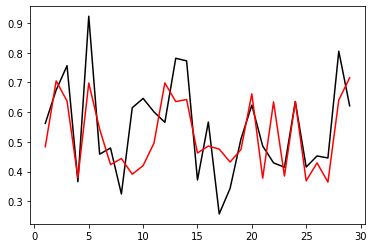

In [46]:
import matplotlib.pyplot as plt
index = [x for x in range(1,30)]
plt.plot(
    index,
    y_test,
    label='actual',
    color='black'
)
plt.plot(
    index,
    y_pred,
    color='red',
    label='predicted'
)
plt.show()

### **Modelling using NuSVR**

In [47]:
from sklearn.svm import NuSVR

In [48]:
model = NuSVR()

hyperparameters = {
    'nu' : [0.25, 0.5, 0.75],
    'C' : [1000, 10000, 100000],
    'kernel' : ['poly','rbf','sigmoid'],
    'gamma' : [0.5, 0.05, 0.005]
}

In [49]:
grid_search = GridSearchCV(model, hyperparameters)

In [50]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                             gamma='scale', kernel='rbf', max_iter=-1, nu=0.5,
                             shrinking=True, tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005],
                         'kernel': ['poly', 'rbf', 'sigmoid'],
                         'nu': [0.25, 0.5, 0.75]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
grid_search.best_params_

{'C': 10000, 'gamma': 0.5, 'kernel': 'rbf', 'nu': 0.5}

In [52]:
model = NuSVR(C=10000, gamma=0.5, kernel='rbf',nu=0.5)

In [53]:
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NuSVR(C=10000, cache_size=200, coef0=0.0, degree=3, gamma=0.5, kernel='rbf',
      max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [54]:
model.score(x_test, y_test)

0.33837848738235166

In [55]:
y_pred = model.predict(x_test)

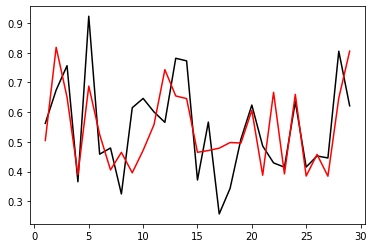

In [56]:
import matplotlib.pyplot as plt
index = [x for x in range(1,30)]
plt.plot(
    index,
    y_test,
    label='actual',
    color='black'
)
plt.plot(
    index,
    y_pred,
    color='red',
    label='predicted'
)
plt.show()

### **Modelling using XGBoost**

In [57]:
import xgboost as xgb

In [75]:
model = xgb.XGBRegressor(objective='reg:squarederror')

In [76]:
model.fit(x_train,y_train, verbose=3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [80]:
model.score(x_test, y_test)

0.22761266419893011

In [77]:
y_pred = model.predict(x_test)

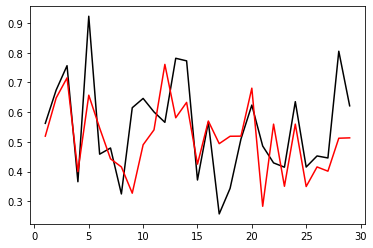

In [79]:
import matplotlib.pyplot as plt
index = [x for x in range(1,30)]
plt.plot(
    index,
    y_test,
    label='actual',
    color='black'
)
plt.plot(
    index,
    y_pred,
    color='red',
    label='predicted'
)
plt.show()